In [106]:
import pandas as pd
import numpy as np

#ruta = 'C:\\Users\\USER\\Desktop\\DATA SCIENTIST\\2 Curso Data Science\\ENTREGA 2\\TX TOTAL 2018-2023_UPTIME OCT2015-SEP2023.csv'
#df= pd.read_csv(ruta, delimiter=';')

url = 'https://raw.githubusercontent.com/crisg1984/DS_LEVANTAR/main/TX%20TOTAL%202018-2023_UPTIME%20OCT2015-SEP2023.csv'
df= pd.read_csv(url, delimiter=';')

print(df.head())
print(df.info())
print(df.describe())
%pwd

    ATM     FECHA UptTotal UptHardware DwtAdmin UptComunicacion UptPromCass  \
0  3402  01-03-18    88,25       98,68     0,12           94,11       36,43   
1  3402  01-04-18    53,55       51,78    12,44           95,29       14,40   
2  3402  01-05-18    61,71       89,55     0,10           71,32       27,45   
3  3402  01-06-18    97,08       99,57     0,26           99,31       28,73   
4  3402  01-07-18    96,07       98,80     0,20           99,67       26,36   

  UptBillete UptOpenST  TX  ... Provincia       Pais  \
0      97,24     99,76 NaN  ...  Santa fe  Argentina   
1      53,68     80,44 NaN  ...  Santa fe  Argentina   
2      93,23     96,38 NaN  ...  Santa fe  Argentina   
3      97,98     99,45 NaN  ...  Santa fe  Argentina   
4      97,01     99,30 NaN  ...  Santa fe  Argentina   

                                 Direccion Completa Coordenadas MAPS (PUNTO)  \
0  Warnes 1917, Rosario, S2000, Santa fe, Argentina     -32.89493, -60.69392   
1  Warnes 1917, Rosario, S20

'C:\\Users\\USER'

In [107]:
#2 CAMBIO DE FORMATO DE FECHA
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d-%m-%y')

# Lista de columnas con valores numéricos
numeric_columns = ['UptTotal', 'UptHardware', 'DwtAdmin', 'UptComunicacion', 'UptPromCass', 'UptBillete', 'UptOpenST']

# Reemplazar comas por puntos y convertir a tipo float
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '.').astype(float)
    
print(df.head())
print(df.info())
print(df.describe())

    ATM      FECHA  UptTotal  UptHardware  DwtAdmin  UptComunicacion  \
0  3402 2018-03-01     88.25        98.68      0.12            94.11   
1  3402 2018-04-01     53.55        51.78     12.44            95.29   
2  3402 2018-05-01     61.71        89.55      0.10            71.32   
3  3402 2018-06-01     97.08        99.57      0.26            99.31   
4  3402 2018-07-01     96.07        98.80      0.20            99.67   

   UptPromCass  UptBillete  UptOpenST  TX  ... Provincia       Pais  \
0        36.43       97.24      99.76 NaN  ...  Santa fe  Argentina   
1        14.40       53.68      80.44 NaN  ...  Santa fe  Argentina   
2        27.45       93.23      96.38 NaN  ...  Santa fe  Argentina   
3        28.73       97.98      99.45 NaN  ...  Santa fe  Argentina   
4        26.36       97.01      99.30 NaN  ...  Santa fe  Argentina   

                                 Direccion Completa Coordenadas MAPS (PUNTO)  \
0  Warnes 1917, Rosario, S2000, Santa fe, Argentina     -32.

In [108]:
#3 Agrupar los datos por número de ATM y fecha
df_agrupado = df.groupby(['ATM', 'FECHA']).agg({
    'UptTotal': 'mean',
    'UptHardware': 'mean',
    'DwtAdmin': 'mean',
    'UptComunicacion': 'mean',
    'UptPromCass': 'mean',
    'UptBillete': 'mean',
    'UptOpenST': 'mean',
    'TX': 'mean',
    'Ubicacion': 'first',  # Tomar el primer valor del grupo
    'Direccion': 'first',   # Tomar el primer valor del grupo
    'Localidad': 'first',        # Tomar el primer valor del grupo
    'Cod Postal': 'first',  # Tomar el primer valor del grupo
    'Provincia': 'first',   # Tomar el primer valor del grupo
    'Pais': 'first',        # Tomar el primer valor del grupo
    'Direccion Completa': 'first',  # Tomar el primer valor del grupo
    'Coordenadas MAPS (PUNTO)': 'first',  # Tomar el primer valor del grupo
    'Coordenadas BING (COMA)': 'first',   # Tomar el primer valor del grupo
    'Latitud': 'first',     # Tomar el primer valor del grupo
    'Longitud': 'first',    # Tomar el primer valor del grupo
    'Responsable': 'first', # Tomar el primer valor del grupo
    'Detalle': 'first',      # Tomar el primer valor del grupo  
    'Q en SITE': 'first'
}).reset_index()

# Agregar la columna "Tasa de Utilizacion" al DataFrame
df_agrupado['Tasa de Utilizacion'] = df_agrupado['TX'] / 10000

# Mostrar información sobre el DataFrame
print(df_agrupado.info())
print(df_agrupado.describe())
# Verificar la fecha mínima en los datos originales
fecha_minima = df_agrupado['FECHA'].min()
print("Fecha mínima en los datos originales:", fecha_minima)


df_agrupado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ATM                       8877 non-null   int64         
 1   FECHA                     8877 non-null   datetime64[ns]
 2   UptTotal                  8566 non-null   float64       
 3   UptHardware               8566 non-null   float64       
 4   DwtAdmin                  8566 non-null   float64       
 5   UptComunicacion           8566 non-null   float64       
 6   UptPromCass               8566 non-null   float64       
 7   UptBillete                8566 non-null   float64       
 8   UptOpenST                 8566 non-null   float64       
 9   TX                        7241 non-null   float64       
 10  Ubicacion                 8877 non-null   object        
 11  Direccion                 8877 non-null   object        
 12  Localidad           

,ATM,FECHA,UptTotal,UptHardware,DwtAdmin,UptComunicacion,UptPromCass,UptBillete,UptOpenST,TX,...,Pais,Direccion Completa,Coordenadas MAPS (PUNTO),Coordenadas BING (COMA),Latitud,Longitud,Responsable,Detalle,Q en SITE,Tasa de Utilizacion
0,3402,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,Argentina,"Warnes 1917, Rosario, S2000, Santa fe, Argentina","-32.89493, -60.69392","-32,89493, -60,69392","-32,89493","-60,69392",BRINKS,BR,1,0.0001
1,3402,2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3306.0,...,Argentina,"Warnes 1917, Rosario, S2000, Santa fe, Argentina","-32.89493, -60.69392","-32,89493, -60,69392","-32,89493","-60,69392",BRINKS,BR,1,0.3306
2,3402,2018-03-01,88.25,98.68,0.12,94.11,36.43,97.24,99.76,4303.0,...,Argentina,"Warnes 1917, Rosario, S2000, Santa fe, Argentina","-32.89493, -60.69392","-32,89493, -60,69392","-32,89493","-60,69392",BRINKS,BR,1,0.4303
3,3402,2018-04-01,53.55,51.78,12.44,95.29,14.40,53.68,80.44,2213.0,...,Argentina,"Warnes 1917, Rosario, S2000, Santa fe, Argentina","-32.89493, -60.69392","-32,89493, -60,69392","-32,89493","-60,69392",BRINKS,BR,1,0.2213
4,3402,2018-05-01,61.71,89.55,0.10,71.32,27.45,93.23,96.38,3745.0,...,Argentina,"Warnes 1917, Rosario, S2000, Santa fe, Argentina","-32.89493, -60.69392","-32,89493, -60,69392","-32,89493","-60,69392",BRINKS,BR,1,0.3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,16666,2023-06-01,68.28,71.74,1.16,99.31,29.91,97.09,82.76,11488.0,...,Argentina,"J J Paso 5753, Rosario, S2000, Santa fe, Argen...","-32.92001, -60.70256","-32,92001, -60,70256","-32,92001","-60,70256",SUC,95,6,1.1488
8873,16666,2023-07-01,92.83,96.88,0.62,99.92,24.67,97.51,99.10,14492.0,...,Argentina,"J J Paso 5753, Rosario, S2000, Santa fe, Argen...","-32.92001, -60.70256","-32,92001, -60,70256","-32,92001","-60,70256",SUC,95,6,1.4492
8874,16666,2023-08-01,94.03,99.70,0.87,99.88,27.26,95.13,99.03,13840.0,...,Argentina,"J J Paso 5753, Rosario, S2000, Santa fe, Argen...","-32.92001, -60.70256","-32,92001, -60,70256","-32,92001","-60,70256",SUC,95,6,1.3840
8875,16666,2023-09-01,89.73,92.40,2.88,99.06,31.64,99.72,95.93,14250.0,...,Argentina,"J J Paso 5753, Rosario, S2000, Santa fe, Argen...","-32.92001, -60.70256","-32,92001, -60,70256","-32,92001","-60,70256",SUC,95,6,1.4250


In [109]:
#4 Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\df_agrupado.csv'

# Guarda el DataFrame en un archivo CSV
df_agrupado.to_csv(ruta_salida, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame

In [115]:
#5 Crear una máscara para las filas con TX mayores a 1000 o NaN
mask_tx = (df['TX'] > 1000) | df['TX'].isna()

# Crear una máscara para las filas con UptTotal mayores a 25 o NaN
mask_upt_total = (df['UptTotal'] > 25) | df['UptTotal'].isna()

# Obtener el DataFrame df_agrupado aplicando ambas máscaras
df_agrupado_final = df[mask_tx & mask_upt_total]

# Agregar la columna "Tasa de Utilizacion" al DataFrame
df_agrupado_final['Tasa de Utilizacion'] = df_agrupado_final['TX'] / 10000

print(df_agrupado_final)
print(df_agrupado_final.info())

fecha_minima = df_agrupado_final['FECHA'].min()
print("Fecha mínima en los datos originales:", fecha_minima)

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida1 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\df_agrupado_final.csv'

# Guarda el DataFrame en un archivo CSV
df_agrupado_final.to_csv(ruta_salida1, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame

C:\Users\USER\AppData\Local\Temp\ipykernel_24896\450065697.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agrupado_final['Tasa de Utilizacion'] = df_agrupado_final['TX'] / 10000


        ATM      FECHA  UptTotal  UptHardware  DwtAdmin  UptComunicacion  \
0      3402 2018-03-01     88.25        98.68      0.12            94.11   
1      3402 2018-04-01     53.55        51.78     12.44            95.29   
2      3402 2018-05-01     61.71        89.55      0.10            71.32   
3      3402 2018-06-01     97.08        99.57      0.26            99.31   
4      3402 2018-07-01     96.07        98.80      0.20            99.67   
...     ...        ...       ...          ...       ...              ...   
15805  9345 2023-10-01       NaN          NaN       NaN              NaN   
15806  9346 2023-10-01       NaN          NaN       NaN              NaN   
15807  9347 2023-10-01       NaN          NaN       NaN              NaN   
15808  9348 2023-10-01       NaN          NaN       NaN              NaN   
15809  9349 2023-10-01       NaN          NaN       NaN              NaN   

       UptPromCass  UptBillete  UptOpenST      TX  ...       Pais  \
0            36.43

In [116]:
#6 GROUP BY FECHA MES
#Asegúrate de que la columna 'FECHA' sea de tipo datetime
df_agrupado_final['FECHA'] = pd.to_datetime(df_agrupado_final['FECHA'])

# Crea una nueva columna 'Mes' que contenga la información del mes y año
df_agrupado_final['FECHA'] = df_agrupado_final['FECHA'].dt.to_period('M')

# Redondear los números en el DataFrame a una cantidad específica de decimales
decimales = 2  # Puedes ajustar esto según tus preferencias
df_agrupado_final = df_agrupado_final.round(decimales)

# Agrupa el DataFrame por mes y año y aplica una función de agregación (por ejemplo, la media) a las columnas numéricas
df_agrupado_por_mes_y_anio = df_agrupado_final.groupby('FECHA', as_index=False).agg({
    'UptTotal': 'mean',
    'UptHardware': 'mean',
    'DwtAdmin': 'mean',
    'UptComunicacion': 'mean',
    'UptPromCass': 'mean',
    'UptBillete': 'mean',
    'UptOpenST': 'mean',
    'TX': 'mean',
      })


# Agregar la columna "Tasa de Utilizacion" al DataFrame
df_agrupado_por_mes_y_anio['Tasa de Utilizacion'] = df_agrupado_por_mes_y_anio['TX'] / 10000

# redondear 2 decimales
df_agrupado_por_mes_y_anio['UptTotal'] = df_agrupado_por_mes_y_anio['UptTotal'].round(2)
df_agrupado_por_mes_y_anio['UptHardware'] = df_agrupado_por_mes_y_anio['UptHardware'].round(2)
df_agrupado_por_mes_y_anio['DwtAdmin'] = df_agrupado_por_mes_y_anio['DwtAdmin'].round(2)
df_agrupado_por_mes_y_anio['UptComunicacion'] = df_agrupado_por_mes_y_anio['UptComunicacion'].round(2)
df_agrupado_por_mes_y_anio['UptPromCass'] = df_agrupado_por_mes_y_anio['UptPromCass'].round(2)
df_agrupado_por_mes_y_anio['UptBillete'] = df_agrupado_por_mes_y_anio['UptBillete'].round(2)
df_agrupado_por_mes_y_anio['UptOpenST'] = df_agrupado_por_mes_y_anio['UptOpenST'].round(2)
df_agrupado_por_mes_y_anio['TX'] = df_agrupado_por_mes_y_anio['TX'].round(0)
df_agrupado_por_mes_y_anio['Tasa de Utilizacion'] = df_agrupado_por_mes_y_anio['Tasa de Utilizacion'].round(2)


# Imprimir las primeras filas del DataFrame agrupado por mes y año

print(df_agrupado_por_mes_y_anio.info())
print(df_agrupado_por_mes_y_anio.describe())

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida2 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\df_agrupado_por_mes_y_anio.csv'

# Guarda el DataFrame en un archivo CSV
df_agrupado_por_mes_y_anio.to_csv(ruta_salida2, index=False, decimal='.') # El parámetro index=False evita que se guarde el índice del DataFrame


df_agrupado_por_mes_y_anio


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   FECHA                97 non-null     period[M]
 1   UptTotal             96 non-null     float64  
 2   UptHardware          96 non-null     float64  
 3   DwtAdmin             96 non-null     float64  
 4   UptComunicacion      96 non-null     float64  
 5   UptPromCass          96 non-null     float64  
 6   UptBillete           96 non-null     float64  
 7   UptOpenST            96 non-null     float64  
 8   TX                   70 non-null     float64  
 9   Tasa de Utilizacion  70 non-null     float64  
dtypes: float64(9), period[M](1)
memory usage: 7.7 KB
None
        UptTotal  UptHardware   DwtAdmin  UptComunicacion  UptPromCass  \
count  96.000000    96.000000  96.000000        96.000000    96.000000   
mean   79.736667    88.578229   1.041771        98.129062    33.92

C:\Users\USER\AppData\Local\Temp\ipykernel_24896\772638073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agrupado_final['FECHA'] = pd.to_datetime(df_agrupado_final['FECHA'])
C:\Users\USER\AppData\Local\Temp\ipykernel_24896\772638073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agrupado_final['FECHA'] = df_agrupado_final['FECHA'].dt.to_period('M')


,FECHA,UptTotal,UptHardware,DwtAdmin,UptComunicacion,UptPromCass,UptBillete,UptOpenST,TX,Tasa de Utilizacion
0,2015-10,79.28,85.76,1.30,95.69,26.77,93.76,95.72,NaN,NaN
1,2015-11,76.45,83.18,1.97,96.59,26.14,91.22,96.01,NaN,NaN
2,2015-12,73.42,83.96,1.26,96.65,25.58,89.36,96.72,NaN,NaN
3,2016-01,83.47,88.44,0.85,96.82,26.96,95.06,97.35,NaN,NaN
4,2016-02,80.69,88.49,2.05,94.92,26.92,95.66,96.73,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
92,2023-06,81.00,85.53,0.32,98.75,25.77,92.33,98.20,10133.0,1.01
93,2023-07,83.34,87.57,0.47,98.96,25.61,92.98,98.06,10078.0,1.01
94,2023-08,84.33,87.97,0.33,98.65,25.09,93.33,98.56,9929.0,0.99
95,2023-09,85.48,89.65,0.41,97.93,25.17,94.71,97.08,10145.0,1.01


In [118]:
#7 

# Lee el archivo CSV con df_uptime_red
#ruta_archivo_csv = 'C:\\Users\\USER\\Desktop\\DATA SCIENTIST\\2 Curso Data Science\\ENTREGA 2\\UPTIME RED.csv'
#df_uptime_red = pd.read_csv(ruta_archivo_csv, delimiter=';')

url = 'https://raw.githubusercontent.com/crisg1984/DS_LEVANTAR/main/UPTIME%20RED.csv'
df_uptime_red = pd.read_csv(url, delimiter=';')

# Convierte la columna 'FECHA' de df_uptime_red al formato 'YYYY-MM' como PeriodDtype
df_uptime_red['FECHA'] = pd.to_datetime(df_uptime_red['FECHA'], format='%Y-%m').dt.to_period('M')

# Reemplazar comas por puntos y convertir la columna a números decimales
df_uptime_red['UP RED'] = df_uptime_red['UP RED'].str.replace(',', '.', regex=True).astype(float)
# Redondear los números a dos decimales
df_uptime_red['UP RED'] = df_uptime_red['UP RED'].round(2)

# Ahora, ambas columnas 'FECHA' tienen el mismo formato 'YYYY-MM', y puedes combinar los DataFrames

# ... (aquí puedes realizar otras operaciones si es necesario)

# Ver las primeras filas del DataFrame df_uptime_red

print(df_uptime_red.info())
print(df_uptime_red.describe())

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida3 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\red.csv'

# Guarda el DataFrame en un archivo CSV
df_uptime_red.to_csv(ruta_salida3, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame

print(df_uptime_red)
#------------------------
# HAGO EL DATAFRAME DEL EFECTIVO Y LO UNO AL df_combinado

#ruta = 'C:\\Users\\USER\\Desktop\\DATA SCIENTIST\\2 Curso Data Science\\DATASETS\\ULTIMOS\\FINAL\\EFECTIVO.csv'
#df_efectivo= pd.read_csv(ruta, delimiter=';')

url = 'https://raw.githubusercontent.com/crisg1984/DS_LEVANTAR/main/EFECTIVO.csv'
df_efectivo = pd.read_csv(url, delimiter=';')

# Convierte la columna 'FECHA' a tipo datetime64
df_efectivo['FECHA'] = pd.to_datetime(df_efectivo['FECHA']).dt.to_period('M')

# Reemplaza las comas por puntos en la columna "Importe" y luego convierte en float
df_efectivo['Importe'] = df_efectivo['Importe'].str.replace(',', '.', regex=True).astype(float)

# Convierte la columna "Importe" en float
df_efectivo['Importe'] = pd.to_numeric(df_efectivo['Importe'], errors='coerce')


# Muestra información actualizada del DataFrame
print(df_efectivo.info())

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida4 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\df_efectivo.csv'

# Guarda el DataFrame en un archivo CSV
df_efectivo.to_csv(ruta_salida4, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame

df_efectivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   FECHA   120 non-null    period[M]
 1   UP RED  117 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 2.0 KB
None
           UP RED
count  117.000000
mean    80.221538
std      5.415936
min     67.840000
25%     77.030000
50%     80.610000
75%     83.790000
max     94.080000
       FECHA  UP RED
0    2014-01   84.09
1    2014-02   87.26
2    2014-03   84.74
3    2014-04   86.37
4    2014-05   84.97
..       ...     ...
115  2023-08   84.34
116  2023-09   85.49
117  2023-10     NaN
118  2023-11     NaN
119  2023-12     NaN

[120 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   FECHA    71 non-null     period[M]
 1   Importe  71 non-

,FECHA,Importe
0,2018-01,9.319200e+10
1,2018-02,8.734764e+10
2,2018-03,1.077744e+11
3,2018-04,9.311627e+10
4,2018-05,9.383277e+10
...,...,...
66,2023-07,9.474513e+11
67,2023-08,8.985569e+11
68,2023-09,9.959484e+11
69,2023-10,1.012129e+12


In [119]:
#8# Combina los dos DataFrames df_combinado y df_uptime_red utilizando la columna 'FECHA' como clave
df_combinado = pd.merge(df_agrupado_por_mes_y_anio, df_uptime_red, on='FECHA', how='left')

# Combina los dos DataFrames df_combinado y df_efectivo utilizando la columna 'FECHA' como clave
df_combinado = pd.merge(df_combinado, df_efectivo, on='FECHA', how='left')

# Redondear los números a dos decimales
df_combinado['UptTotal'] = df_combinado['UptTotal'].round(2)

# Ver las primeras filas del DataFrame combinado
print(df_combinado.info())
print(df_combinado.describe())

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida5 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\COMBINACION FINAL.csv'

# Guarda el DataFrame en un archivo CSV
df_combinado.to_csv(ruta_salida5, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame

df_combinado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   FECHA                97 non-null     period[M]
 1   UptTotal             96 non-null     float64  
 2   UptHardware          96 non-null     float64  
 3   DwtAdmin             96 non-null     float64  
 4   UptComunicacion      96 non-null     float64  
 5   UptPromCass          96 non-null     float64  
 6   UptBillete           96 non-null     float64  
 7   UptOpenST            96 non-null     float64  
 8   TX                   70 non-null     float64  
 9   Tasa de Utilizacion  70 non-null     float64  
 10  UP RED               96 non-null     float64  
 11  Importe              70 non-null     float64  
dtypes: float64(11), period[M](1)
memory usage: 9.9 KB
None
        UptTotal  UptHardware   DwtAdmin  UptComunicacion  UptPromCass  \
count  96.000000    96.000000  96.0

,FECHA,UptTotal,UptHardware,DwtAdmin,UptComunicacion,UptPromCass,UptBillete,UptOpenST,TX,Tasa de Utilizacion,UP RED,Importe
0,2015-10,79.28,85.76,1.30,95.69,26.77,93.76,95.72,NaN,NaN,80.40,NaN
1,2015-11,76.45,83.18,1.97,96.59,26.14,91.22,96.01,NaN,NaN,75.90,NaN
2,2015-12,73.42,83.96,1.26,96.65,25.58,89.36,96.72,NaN,NaN,72.05,NaN
3,2016-01,83.47,88.44,0.85,96.82,26.96,95.06,97.35,NaN,NaN,83.79,NaN
4,2016-02,80.69,88.49,2.05,94.92,26.92,95.66,96.73,NaN,NaN,80.61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
92,2023-06,81.00,85.53,0.32,98.75,25.77,92.33,98.20,10133.0,1.01,80.88,8.644636e+11
93,2023-07,83.34,87.57,0.47,98.96,25.61,92.98,98.06,10078.0,1.01,83.35,9.474513e+11
94,2023-08,84.33,87.97,0.33,98.65,25.09,93.33,98.56,9929.0,0.99,84.34,8.985569e+11
95,2023-09,85.48,89.65,0.41,97.93,25.17,94.71,97.08,10145.0,1.01,85.49,9.959484e+11


In [120]:
#9 Filtra las filas donde el año en la columna 'FECHA' no sea 2023
df_bruto = df_combinado[df_combinado['FECHA'].dt.year != 2023]

# Filtra las filas donde el año en la columna 'FECHA' sea igual a 2023
df_test = df_combinado[df_combinado['FECHA'].dt.year == 2023]
# Convertir la columna 'FECHA' a datetime para df_bruto
df_bruto['FECHA'] = df_bruto['FECHA'].dt.to_timestamp()

# Convertir la columna 'FECHA' a datetime para df_test
df_test['FECHA'] = df_test['FECHA'].dt.to_timestamp()



print(df_bruto.head())
print(df_bruto.info())
print(df_bruto.describe())


       FECHA  UptTotal  UptHardware  DwtAdmin  UptComunicacion  UptPromCass  \
0 2015-10-01     79.28        85.76      1.30            95.69        26.77   
1 2015-11-01     76.45        83.18      1.97            96.59        26.14   
2 2015-12-01     73.42        83.96      1.26            96.65        25.58   
3 2016-01-01     83.47        88.44      0.85            96.82        26.96   
4 2016-02-01     80.69        88.49      2.05            94.92        26.92   

   UptBillete  UptOpenST  TX  Tasa de Utilizacion  UP RED  Importe  
0       93.76      95.72 NaN                  NaN   80.40      NaN  
1       91.22      96.01 NaN                  NaN   75.90      NaN  
2       89.36      96.72 NaN                  NaN   72.05      NaN  
3       95.06      97.35 NaN                  NaN   83.79      NaN  
4       95.66      96.73 NaN                  NaN   80.61      NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Col

C:\Users\USER\AppData\Local\Temp\ipykernel_24896\1133052720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bruto['FECHA'] = df_bruto['FECHA'].dt.to_timestamp()
C:\Users\USER\AppData\Local\Temp\ipykernel_24896\1133052720.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['FECHA'] = df_test['FECHA'].dt.to_timestamp()


In [121]:
#"COMIENZO" CON EL TRABAJO 

#DEFINICION DE LA ESTRUCTURA DE DATOS: consiste en el dataset del rendimiento de Cajeros Automaticos
#de una entidad bancaria, donde el eje central es el indicadot de "Uptime", ratio que muestra el 
#rendimiento medido en porcentaje, de una unidad, en el transcurso de un dia. Ej: un 80% de Uptime,
# refiere que esa maquina estuvo disponible, de las 24hs del dia, un 80% del tiempo... 

#OBJETIVO: Predicir cuál será el Uptime Mensual, para los meses de 2023 (de Enero en adelante.. 
# de NO tener exito con este enfoque, se buscará predecir Uptime para mismo mes, deduciendo que 
# el indicador es vé influido por la estacionalidad. 

#Variable Target: Indicador Mensual Uptime al 01-01-23


# NOTA: el indicador uptime se supone un indicador acumulado del dia/mes/año, donde la estima  
# mensual, se entrega al finalizar el ultimo dia del mes; es por eso que a los efectos del trabajo
#con fechas en el dataset, si bien de expresa por ejemplo 01-10-15, el mismo refiere a lo
#acumulado del mes de Octubre de 2015
#(que en la realidad, se obtiene tecnicamente la info el 01-11-15)

# Punto de Observacion: 31-12-22 (indicador 01-12-22) 

#Features: Información relacionada al historial de Uptime de la entidad, mas Uptime de Red, 
#Tasa de Utilizacion, etc, serán informacion para construir features


In [122]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Importo libreria para trabajar con dates 
from datetime import timedelta
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler

# CREO VARIABLE TARGET:
df = df_bruto
# Creo un nuevo DataFrame "df" con las columnas "FECHA" y "UptTotal" del DataFrame original
df = df_bruto[['FECHA', 'UptTotal']]

# Renombro las columnas
df.rename(columns={'FECHA': 'Date_Target', 'UptTotal': 'UptTARGET'}, inplace=True)

# Muestro las primeras filas del DataFrame
print(df.head())


  Date_Target  UptTARGET
0  2015-10-01      79.28
1  2015-11-01      76.45
2  2015-12-01      73.42
3  2016-01-01      83.47
4  2016-02-01      80.69


C:\Users\USER\AppData\Local\Temp\ipykernel_24896\2010188354.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'FECHA': 'Date_Target', 'UptTotal': 'UptTARGET'}, inplace=True)


In [123]:
from dateutil.relativedelta import relativedelta

# Transforma la columna "Date_Target" en tipo de dato datetime si aún no lo está
df['Date_Target'] = pd.to_datetime(df['Date_Target'])

# Calcula la fecha "un mes antes" y asigna el resultado a la columna "Date_unMesAntes"
df['Date_unMesAntes'] = df['Date_Target'].apply(lambda x: x - relativedelta(months=1))

# Muestra las primeras filas del DataFrame
print(df.head())


  Date_Target  UptTARGET Date_unMesAntes
0  2015-10-01      79.28      2015-09-01
1  2015-11-01      76.45      2015-10-01
2  2015-12-01      73.42      2015-11-01
3  2016-01-01      83.47      2015-12-01
4  2016-02-01      80.69      2016-01-01


C:\Users\USER\AppData\Local\Temp\ipykernel_24896\3675595620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Target'] = pd.to_datetime(df['Date_Target'])
C:\Users\USER\AppData\Local\Temp\ipykernel_24896\3675595620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_unMesAntes'] = df['Date_Target'].apply(lambda x: x - relativedelta(months=1))


In [124]:
# EMPIEZO A CALCULAR FEATURES (HAGO UN JOIN ENTRE DATAFRAMES)

#no voy a tener margen como en el ejemplo de clase de acciones porque ajusté
# con otro codigo las fechas

# HAGO SOLO UptTOtal... si funciona quizas pueda meter los otros iindicadores.      

# Realizar la unión basada en el margen de tiempo
df_entrenar = pd.merge_asof(df, df_bruto[['FECHA','UptTotal','UptHardware','DwtAdmin','UptComunicacion','UptPromCass','UptBillete', 'TX','Tasa de Utilizacion', 'Importe', 'UP RED']], 
                          left_on = 'Date_unMesAntes',  
                          right_on = 'FECHA', 
                          direction = 'backward')

df_entrenar.rename(columns={
    'UptTotal': 'UptTotal_unMesAntes',
    'UptHardware': 'UptHardware_unMesAntes',
    'DwtAdmin': 'DwtAdmin_unMesAntes',
    'UptComunicacion': 'UptComunicacion_unMesAntes',
    'UptPromCass': 'UptPromCass_unMesAntes',
    'UptBillete': 'UptBillete_unMesAntes',
    'TX': 'TX_unMesAntes',
    'Tasa de Utilizacion': 'Tasa_de_Utilizacion_unMesAntes',
    'UP RED': 'UP_RED_unMesAntes',
    'Importe': 'Importe_unMesAntes',
}, inplace=True)

print(df_entrenar.info())

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida7 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\ENTRENAR.csv'

# Guarda el DataFrame en un archivo CSV
df_entrenar.to_csv(ruta_salida7, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame

df_entrenar

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date_Target                     87 non-null     datetime64[ns]
 1   UptTARGET                       87 non-null     float64       
 2   Date_unMesAntes                 87 non-null     datetime64[ns]
 3   FECHA                           86 non-null     datetime64[ns]
 4   UptTotal_unMesAntes             86 non-null     float64       
 5   UptHardware_unMesAntes          86 non-null     float64       
 6   DwtAdmin_unMesAntes             86 non-null     float64       
 7   UptComunicacion_unMesAntes      86 non-null     float64       
 8   UptPromCass_unMesAntes          86 non-null     float64       
 9   UptBillete_unMesAntes           86 non-null     float64       
 10  TX_unMesAntes                   59 non-null     float64       
 11  Tasa_de_

,Date_Target,UptTARGET,Date_unMesAntes,FECHA,UptTotal_unMesAntes,UptHardware_unMesAntes,DwtAdmin_unMesAntes,UptComunicacion_unMesAntes,UptPromCass_unMesAntes,UptBillete_unMesAntes,TX_unMesAntes,Tasa_de_Utilizacion_unMesAntes,Importe_unMesAntes,UP_RED_unMesAntes
0,2015-10-01,79.28,2015-09-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-01,76.45,2015-10-01,2015-10-01,79.28,85.76,1.30,95.69,26.77,93.76,NaN,NaN,NaN,80.40
2,2015-12-01,73.42,2015-11-01,2015-11-01,76.45,83.18,1.97,96.59,26.14,91.22,NaN,NaN,NaN,75.90
3,2016-01-01,83.47,2015-12-01,2015-12-01,73.42,83.96,1.26,96.65,25.58,89.36,NaN,NaN,NaN,72.05
4,2016-02-01,80.69,2016-01-01,2016-01-01,83.47,88.44,0.85,96.82,26.96,95.06,NaN,NaN,NaN,83.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2022-08-01,87.06,2022-07-01,2022-07-01,81.02,87.56,0.70,99.08,37.14,93.25,10500.0,1.05,5.640753e+11,80.40
83,2022-09-01,87.70,2022-08-01,2022-08-01,87.06,91.08,0.70,98.67,33.74,96.48,10070.0,1.01,4.975054e+11,87.25
84,2022-10-01,80.87,2022-09-01,2022-09-01,87.70,90.12,0.74,99.07,34.09,95.98,10498.0,1.05,5.393148e+11,87.95
85,2022-11-01,81.54,2022-10-01,2022-10-01,80.87,86.53,0.70,98.67,31.30,93.67,10174.0,1.02,5.688055e+11,81.33


In [125]:
# EVALUACION DE VALORES NULOS
# Calcular la cantidad de nulos y el porcentaje de nulos por columna
nulos = df_entrenar.isnull().sum()
nulos_pct = nulos / df_entrenar.shape[0]

# Crear un DataFrame con la cantidad y el porcentaje de nulos
nulos_resumen = pd.DataFrame({'Cant_Nulos': nulos, 'Pct_Nulos': nulos_pct})

# Filtrar solo las filas con valores nulos
nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0, :]

# Ordenar el DataFrame por la cantidad de nulos de forma descendente
nulos_resumen = nulos_resumen.sort_values(by='Cant_Nulos', ascending=False)

# Mostrar el resumen de nulos
nulos_resumen


,Cant_Nulos,Pct_Nulos
TX_unMesAntes,28,0.321839
Tasa_de_Utilizacion_unMesAntes,28,0.321839
Importe_unMesAntes,28,0.321839
FECHA,1,0.011494
UptTotal_unMesAntes,1,0.011494
UptHardware_unMesAntes,1,0.011494
DwtAdmin_unMesAntes,1,0.011494
UptComunicacion_unMesAntes,1,0.011494
UptPromCass_unMesAntes,1,0.011494
UptBillete_unMesAntes,1,0.011494


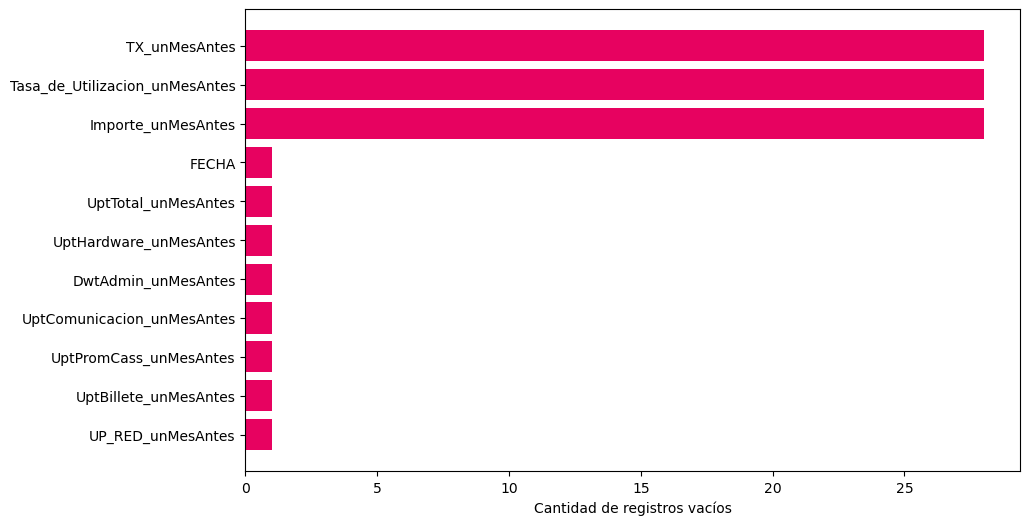

In [126]:
# Graficamente
plt.figure(figsize=(10, 6))
plt.barh(nulos_resumen.index, 
         nulos_resumen['Cant_Nulos'],  # Corregir el nombre de la columna
         color='#E70260')
plt.xlabel('Cantidad de registros vacíos')
plt.gca().invert_yaxis()  
plt.show()


In [128]:
# Valores que deseas ingresar en TX_unMesAntes
nuevos_valores_TX = [None, 9825.0, 10507.0, 11714.0, 11615.0, 10325.0, 11538.0, 10745.0, 11620.0, 11187.0,
11938.0, 10956.0, 10725.0, 9333.0, 11186.0, 11148.0, 10997.0, 10688.0, 11301.0, 9100.0,
10970.0, 10645.0, 12165.0, 10232.0, 10407.0, 9928.0, 10352.0, 12282.0]

# Llena los valores nulos en TX_unMesAntes con la lista de nuevos valores
df_entrenar['TX_unMesAntes'].fillna(pd.Series(nuevos_valores_TX), inplace=True)

# Valores que deseas ingresar en Tasa_de_Utilizacion_unMesAntes
nuevos_valores_tasa = [None, 0.98, 1.05, 1.17, 1.16, 1.03, 1.15, 1.07, 1.16, 1.12, 1.19, 1.10, 1.07, 0.93,
1.12, 1.11, 1.10, 1.07, 1.13, 0.91, 1.10, 1.06, 1.22, 1.02, 1.04, 0.99, 1.04, 1.23]

# Llena los valores nulos en Tasa_de_Utilizacion_unMesAntes con la lista de nuevos valores
df_entrenar['Tasa_de_Utilizacion_unMesAntes'].fillna(pd.Series(nuevos_valores_tasa), inplace=True)

# Valores que deseas ingresar en Importe_unMesAntes
nuevos_valores_importe = [None, 101917402730.00, 115847595438.00, 164455872271.00, 95491480573.00, 89807350804.00, 
109827581533.00, 101557789726.00, 101590350661.00, 114161879382.00, 117992830369.00,
106799747348.00, 113596202523.00, 96813819370.00, 123333365503.00, 
156504110537.00, 90412024796.00, 92968249010.00, 107573056399.00, 86009572679.00, 
95907326095.00, 108633313569.00, 120240602141.00, 99748514783.00, 110237175029.00,
102984398748.00, 114135263419.00, 172430033335.00]

# Llena los valores nulos en Importe_unMesAntes con la lista de nuevos valores
df_entrenar['Importe_unMesAntes'].fillna(pd.Series(nuevos_valores_importe), inplace=True)

# Elimina la primera fila del DataFrame
df_entrenar = df_entrenar.iloc[1:]

# Muestra el DataFrame después de la eliminación
print(df_entrenar.head())

# Muestra los recuentos de valores nulos después de llenarlos
print(df_entrenar.isnull().sum())

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida6 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\ENTRENAR2.csv'

# Guarda el DataFrame en un archivo CSV
df_entrenar.to_csv(ruta_salida6, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame


  Date_Target  UptTARGET Date_unMesAntes      FECHA  UptTotal_unMesAntes  \
2  2015-12-01      73.42      2015-11-01 2015-11-01                76.45   
3  2016-01-01      83.47      2015-12-01 2015-12-01                73.42   
4  2016-02-01      80.69      2016-01-01 2016-01-01                83.47   
5  2016-03-01      81.84      2016-02-01 2016-02-01                80.69   
6  2016-04-01      82.17      2016-03-01 2016-03-01                81.84   

   UptHardware_unMesAntes  DwtAdmin_unMesAntes  UptComunicacion_unMesAntes  \
2                   83.18                 1.97                       96.59   
3                   83.96                 1.26                       96.65   
4                   88.44                 0.85                       96.82   
5                   88.49                 2.05                       94.92   
6                   88.29                 1.48                       97.32   

   UptPromCass_unMesAntes  UptBillete_unMesAntes  TX_unMesAntes  \
2      

C:\Users\USER\AppData\Local\Temp\ipykernel_24896\3573333316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrenar['TX_unMesAntes'].fillna(pd.Series(nuevos_valores_TX), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_24896\3573333316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrenar['Tasa_de_Utilizacion_unMesAntes'].fillna(pd.Series(nuevos_valores_tasa), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_24896\3573333316.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

Text(0, 0.5, 'Uptime')

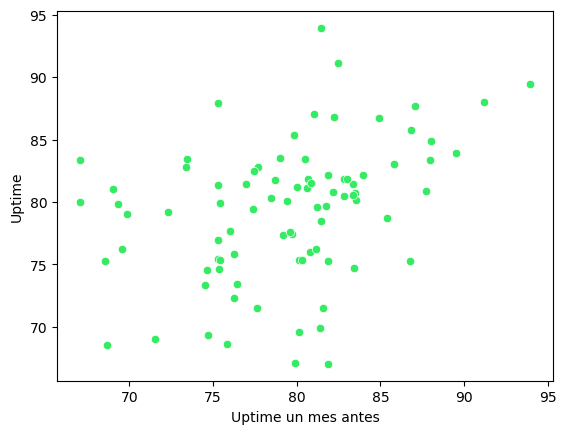

In [64]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'UptTotal_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('Uptime un mes antes')
plt.ylabel('Uptime')

Text(0, 0.5, 'Uptime')

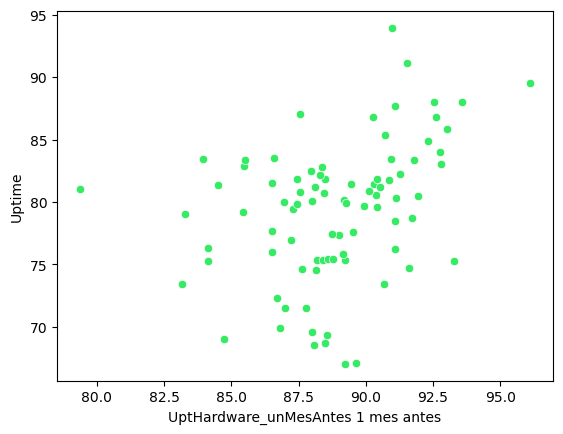

In [65]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'UptHardware_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('UptHardware_unMesAntes 1 mes antes')
plt.ylabel('Uptime')



Text(0, 0.5, 'Uptime')

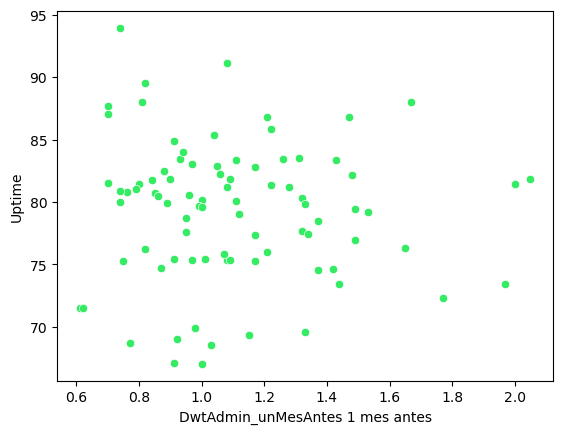

In [66]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'DwtAdmin_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('DwtAdmin_unMesAntes 1 mes antes')
plt.ylabel('Uptime')

Text(0, 0.5, 'Uptime')

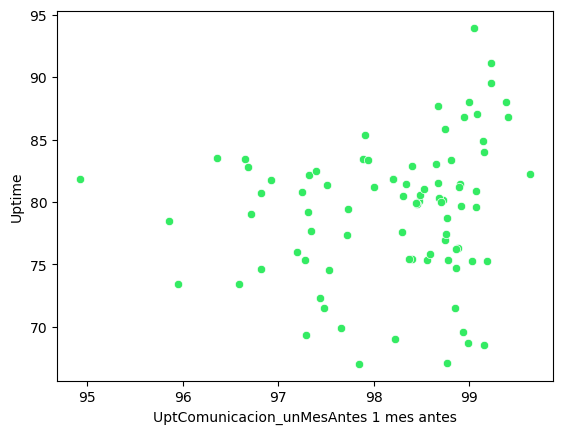

In [67]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'UptComunicacion_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('UptComunicacion_unMesAntes 1 mes antes')
plt.ylabel('Uptime')

Text(0, 0.5, 'Uptime')

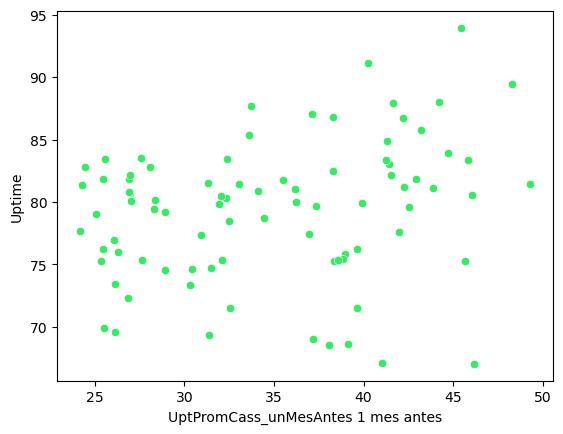

In [68]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'UptPromCass_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('UptPromCass_unMesAntes 1 mes antes')
plt.ylabel('Uptime')

Text(0, 0.5, 'Uptime')

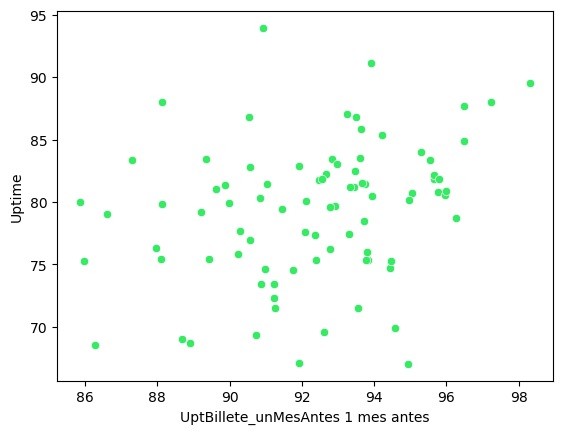

In [69]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'UptBillete_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('UptBillete_unMesAntes 1 mes antes')
plt.ylabel('Uptime')

Text(0, 0.5, 'Uptime')

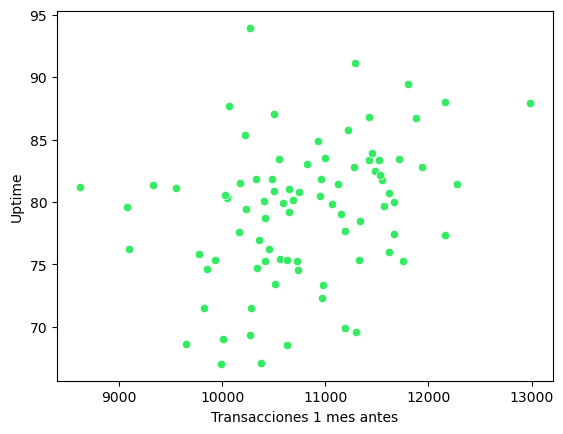

In [70]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'TX_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('Transacciones 1 mes antes')
plt.ylabel('Uptime')

Text(0, 0.5, 'Uptime')

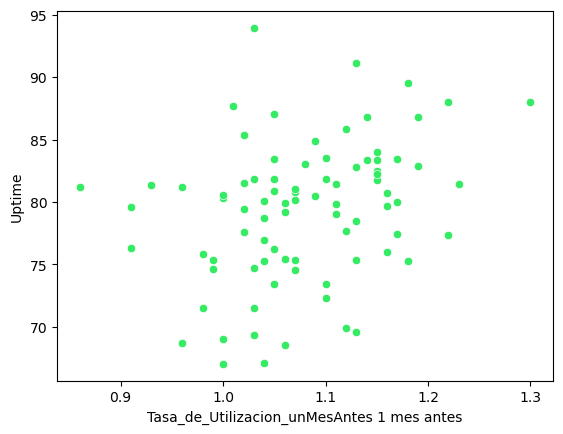

In [71]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'Tasa_de_Utilizacion_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('Tasa_de_Utilizacion_unMesAntes 1 mes antes')
plt.ylabel('Uptime')

Text(0, 0.5, 'Uptime')

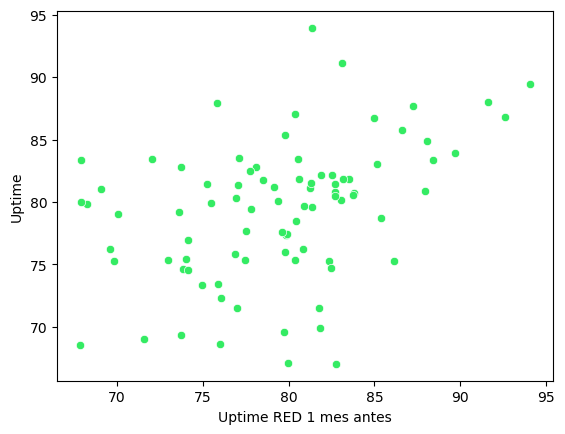

In [72]:
#Hay relación entre target y features creadas?
#Analisis si las features que generé tiene relación con la variable target

plt.figure()
sns.scatterplot(data = df_entrenar,
                x = 'UP_RED_unMesAntes',
                y = 'UptTARGET',
               color = '#34EB63')
plt.xlabel('Uptime RED 1 mes antes')
plt.ylabel('Uptime')

In [73]:
# Estimo coeficientes para modelo de regresión lineal con una sola variable:
model1 = 'UptTARGET ~ UptTotal_unMesAntes + UP_RED_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     8.108
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           0.000612
Time:                        16:35:46   Log-Likelihood:                -258.29
No. Observations:                  85   AIC:                             522.6
Df Residuals:                      82   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              50.3689    

In [74]:
#coeficientes de correlacion (intercepto u ordenada al origen y pendiente)
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)


Coeficientes:
Intercept              50.368883
UptTotal_unMesAntes    -0.323778
UP_RED_unMesAntes       0.688330
dtype: float64


In [75]:
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 
# cambia el signo en ambas variables... significa que el beta puede ser 0... 
#es decir que NO existiria relacion entre las variables... WTF??

Intervalo de confianza de los coeficientes:
                             0          1
Intercept            34.228559  66.509208
UptTotal_unMesAntes  -1.148448   0.500892
UP_RED_unMesAntes    -0.103875   1.480534


In [76]:
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

# son cercanos a cero. menores a 0,5, asi que sirven.. 

P-Valores:
Intercept              0.000000
UptTotal_unMesAntes    0.437030
UP_RED_unMesAntes      0.087666
dtype: float64


In [77]:
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

# r2 muy lejos de 1... 



Coeficiente de determinación (R-cuadrado): 0.165


In [78]:
# Estimo coeficientes para modelo de regresión lineal con una sola variable:
model1 = 'UptTARGET ~ UP_RED_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     15.68
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           0.000158
Time:                        16:35:53   Log-Likelihood:                -258.61
No. Observations:                  85   AIC:                             521.2
Df Residuals:                      83   BIC:                             526.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            48.5988      7.77

In [79]:
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

Coeficientes:
Intercept            48.598821
UP_RED_unMesAntes     0.386849
dtype: float64


In [80]:
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

Intervalo de confianza de los coeficientes:
                           0          1
Intercept          33.140174  64.057468
UP_RED_unMesAntes   0.192536   0.581161


In [81]:
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

# debe cercano a 0..como mucho 0,05... muy altos

P-Valores:
Intercept            0.000000
UP_RED_unMesAntes    0.000158
dtype: float64


In [82]:
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

# r2 muy lejos de 1... cerca de 0,8 se podria decir que es un buen modelo, pero es muy bajo

Coeficiente de determinación (R-cuadrado): 0.159


In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Libreria para estandarizar la data 
from sklearn.preprocessing import StandardScaler
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_24896\316912779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UptTARGET'] = (df['UptTARGET'])


Text(0.5, 1.0, 'Distribución de UptTARGET')

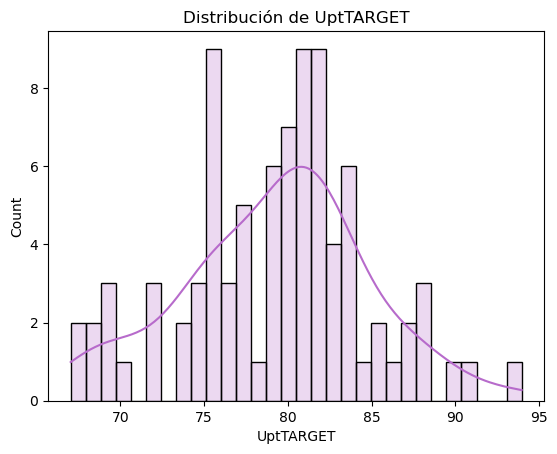

In [84]:
# GRAFICO PARA VER COMO SE DISTRIBUYE
#Primero genero la variable logaritmica 
df['UptTARGET'] = (df['UptTARGET'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'UptTARGET',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='count',
             color = '#B76BCB')
plt.title('Distribución de UptTARGET')

In [86]:
print(df_entrenar.info())
print(df_entrenar.describe())

null_counts = df_entrenar.isnull().sum()

df_analizar = df_entrenar

# Especifica la ruta donde deseas guardar el archivo CSV
ruta_salida8 = 'C:\\Users\\USER\\Documents\\DS_GRABAR\\ANALIZAR.csv'

# Guarda el DataFrame en un archivo CSV
df_entrenar.to_csv(ruta_salida8, index=False)  # El parámetro index=False evita que se guarde el índice del DataFrame

# Seleccionar las variables que quieres analizar
variables_analizar = [
    'UptTotal_unMesAntes',
    'UptHardware_unMesAntes',
    'DwtAdmin_unMesAntes',
    'UptComunicacion_unMesAntes',
    'UptPromCass_unMesAntes',
    'UptBillete_unMesAntes',
    'TX_unMesAntes',
    'Tasa_de_Utilizacion_unMesAntes',
    'UP_RED_unMesAntes',
    'Importe_Año_unMesAntes']

# Calculo matriz de correlación 
matriz_correlacion = df_analizar.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['UptTARGET']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['UptTARGET']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 2 to 86
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date_Target                     85 non-null     datetime64[ns]
 1   UptTARGET                       85 non-null     float64       
 2   Date_unMesAntes                 85 non-null     datetime64[ns]
 3   FECHA                           85 non-null     datetime64[ns]
 4   UptTotal_unMesAntes             85 non-null     float64       
 5   UptHardware_unMesAntes          85 non-null     float64       
 6   DwtAdmin_unMesAntes             85 non-null     float64       
 7   UptComunicacion_unMesAntes      85 non-null     float64       
 8   UptPromCass_unMesAntes          85 non-null     float64       
 9   UptBillete_unMesAntes           85 non-null     float64       
 10  TX_unMesAntes                   85 non-null     float64       
 11  Tasa_de_

C:\Users\USER\AppData\Local\Temp\ipykernel_24896\2834758240.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_analizar.corr(method='pearson')


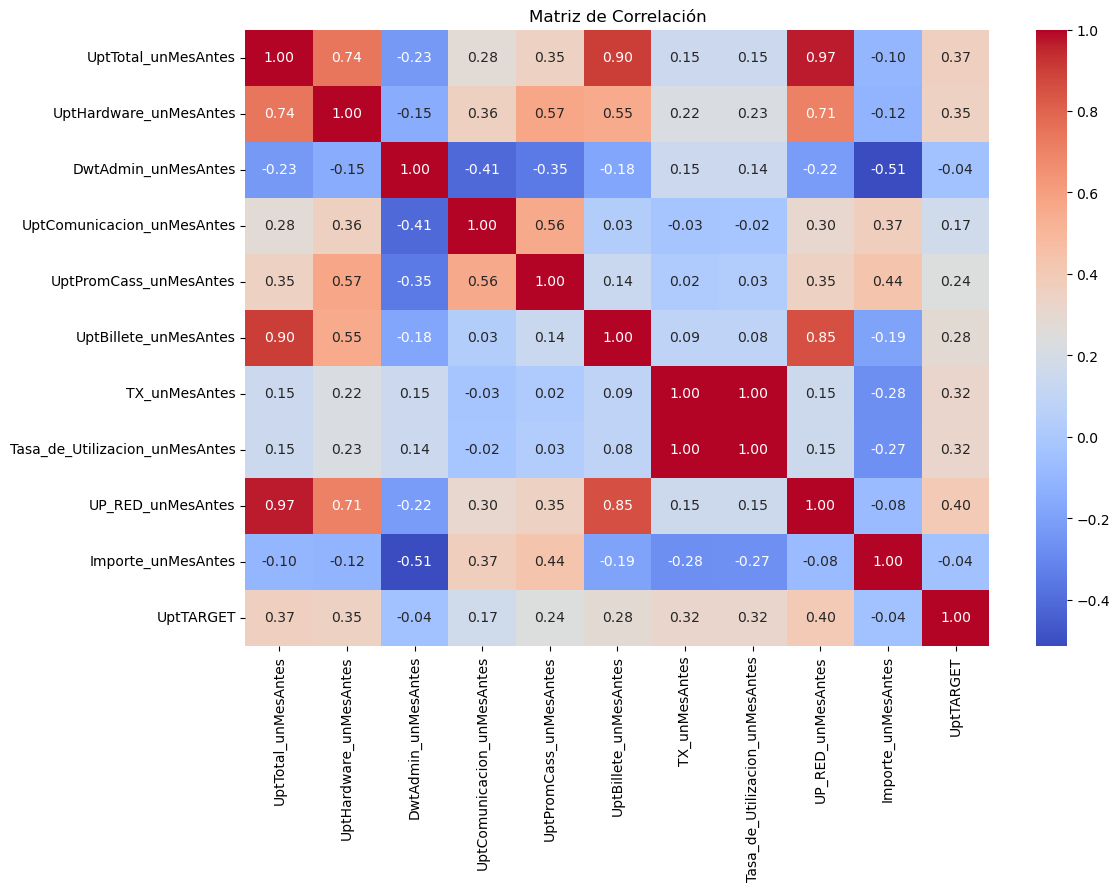

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables que quieres analizar
variables_analizar = [
    'UptTotal_unMesAntes',
    'UptHardware_unMesAntes',
    'DwtAdmin_unMesAntes',
    'UptComunicacion_unMesAntes',
    'UptPromCass_unMesAntes',
    'UptBillete_unMesAntes',
    'TX_unMesAntes',
    'Tasa_de_Utilizacion_unMesAntes',
    'UP_RED_unMesAntes',
    'Importe_unMesAntes']

# Agregar la variable objetivo 'UptTARGET' a la lista de variables a analizar
variables_analizar.append('UptTARGET')

# Calcular la matriz de correlación
matriz_correlacion = df_entrenar[variables_analizar].corr(method='pearson')

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


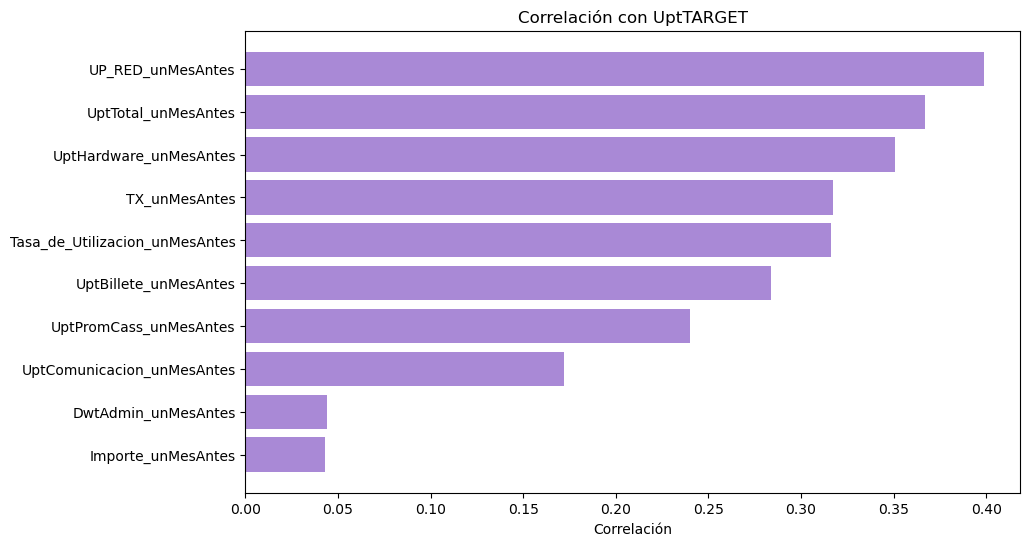

In [88]:
# Grafico el top 10 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:10]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con UptTARGET')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [89]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ UP_RED_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     15.68
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           0.000158
Time:                        16:37:21   Log-Likelihood:                -258.61
No. Observations:                  85   AIC:                             521.2
Df Residuals:                      83   BIC:                             526.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            48.5988      7.77

In [90]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ UptTotal_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           0.000551
Time:                        16:37:23   Log-Likelihood:                -259.81
No. Observations:                  85   AIC:                             523.6
Df Residuals:                      83   BIC:                             528.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.8747    

In [91]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ UptHardware_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     11.66
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           0.000991
Time:                        16:37:26   Log-Likelihood:                -260.38
No. Observations:                  85   AIC:                             524.8
Df Residuals:                      83   BIC:                             529.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 16

In [92]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ TX_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))
#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 
#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)
#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     9.302
Date:                Sat, 02 Dec 2023   Prob (F-statistic):            0.00307
Time:                        16:37:28   Log-Likelihood:                -261.45
No. Observations:                  85   AIC:                             526.9
Df Residuals:                      83   BIC:                             531.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        55.0824      7.960      6.920

In [93]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ Tasa_de_Utilizacion_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     9.228
Date:                Sat, 02 Dec 2023   Prob (F-statistic):            0.00319
Time:                        16:37:30   Log-Likelihood:                -261.48
No. Observations:                  85   AIC:                             527.0
Df Residuals:                      83   BIC:                             531.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [94]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ UptBillete_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     7.266
Date:                Sat, 02 Dec 2023   Prob (F-statistic):            0.00851
Time:                        16:37:33   Log-Likelihood:                -262.40
No. Observations:                  85   AIC:                             528.8
Df Residuals:                      83   BIC:                             533.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                25.97

In [95]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ UptPromCass_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.077
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0269
Time:                        16:37:35   Log-Likelihood:                -263.44
No. Observations:                  85   AIC:                             530.9
Df Residuals:                      83   BIC:                             535.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 72

In [96]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ UptComunicacion_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.529
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.116
Time:                        16:37:38   Log-Likelihood:                -264.69
No. Observations:                  85   AIC:                             533.4
Df Residuals:                      83   BIC:                             538.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [97]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ DwtAdmin_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1611
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.689
Time:                        16:37:40   Log-Likelihood:                -265.88
No. Observations:                  85   AIC:                             535.8
Df Residuals:                      83   BIC:                             540.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              80.1675    

In [98]:
# COEFICIENTES DE UNA SOLA VARIABLE
model1 = 'UptTARGET ~ Importe_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1532
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.696
Time:                        16:37:43   Log-Likelihood:                -265.88
No. Observations:                  85   AIC:                             535.8
Df Residuals:                      83   BIC:                             540.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             79.6600      1

In [99]:
model1 = 'UptTARGET ~ UP_RED_unMesAntes + UptTotal_unMesAntes + UptHardware_unMesAntes + TX_unMesAntes + Tasa_de_Utilizacion_unMesAntes + UptBillete_unMesAntes + UptPromCass_unMesAntes + UptComunicacion_unMesAntes + DwtAdmin_unMesAntes + Importe_unMesAntes'
lm1   = sm.ols(formula = model1, data = df_entrenar).fit()
print(lm1.summary())

#1) TEST BETA (P-VALUES)
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

#2) INTERVALOS DE CONFIANZA
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza) 

#3) SIGNO DEL BETA
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

#4) COEFICIENTE DE DETERMINACION
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

                            OLS Regression Results                            
Dep. Variable:              UptTARGET   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2.496
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0122
Time:                        16:37:47   Log-Likelihood:                -253.61
No. Observations:                  85   AIC:                             529.2
Df Residuals:                      74   BIC:                             556.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   